In [1]:
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert
from pygimli.viewer.mpl import showDataContainerAsMatrix

In [2]:
plc = mt.createWorld(start=[-20, -20, -10], end=[20, 20, 0], marker=1, area=2)
scheme = ert.createData(elecs=pg.utils.grange(start=-10, end=10, n=21), schemeName='dd')
block = mt.createCube(size=[5, 5, 2], pos=[0, 0, -5], marker=2, area=1)
plc += block
for start in scheme.sensorPositions():
    _= plc.createNode(start, marker=-99)
    _= plc.createNode(start + [0.0, 0, -0.2])
mesh = mt.createMesh(plc, quality=1.3)  # , smooth=True)
pg.show(mesh, mesh.cellMarkers(), showMesh=True)

BokehModel(combine_events=True, render_bundle={'docs_json': {'4574a764-67fa-48c7-afb7-7659ffb54baa': {'defs': …

(<pyvista.plotting.plotting.Plotter at 0x2a1ad6c13d0>, None)

In [3]:
# rhomap = [[1, 1.290051930293877e+03 - 4.304514491654190e+02j], [2, 4.192315337624802e+03 - 2.000336844787337e+03j]]
rhomap = [[1, 1000*np.exp(0.01*1j)], [2, 4000*np.exp(0.2*1j)]]
dataFD = ert.simulate(mesh, res=rhomap, scheme=scheme, verbose=True)

25/10/23 - 09:21:34 - pyGIMLi - INFO - Complex resistivity values found.


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2a1c75095e0>)

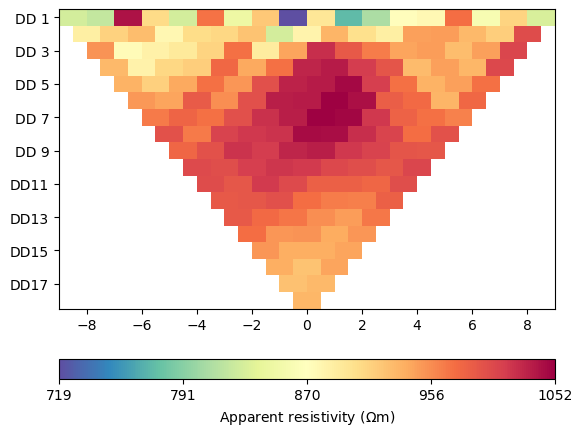

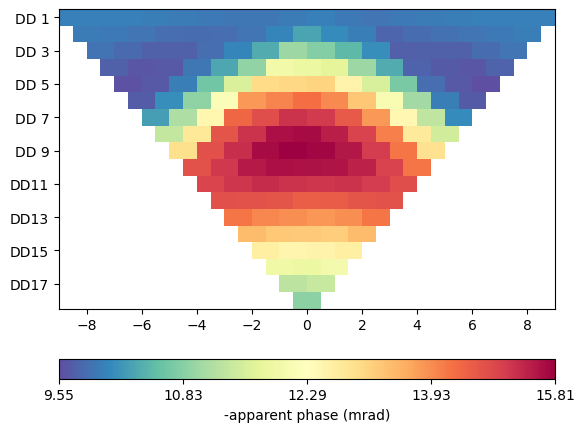

In [4]:
dataFD.show()
dataFD.show(dataFD["phia"]*1000, label="-apparent phase (mrad)")